# **Netflix-Shows EDA**

**In this we have a dataset of NETFILX-Shows in which we are performing an Exploatry Data Analysis on Kaggle Platform.**

# **Importing the Libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import warnings
from textblob import TextBlob
from wordcloud import WordCloud
warnings.filterwarnings('ignore')

# **Importing the Data**

In [2]:
a=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
a

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:
a['show_id'].duplicated().sum()

0

In [4]:
a=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv',index_col='show_id')
a

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [5]:
#retrive data from index S3(2nd index,index number starts from 0) using iloc()
a.iloc[2]

type                                                      TV Show
title                                                   Ganglands
director                                          Julien Leclercq
cast            Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
country                                                       NaN
date_added                                     September 24, 2021
release_year                                                 2021
rating                                                      TV-MA
duration                                                 1 Season
listed_in       Crime TV Shows, International TV Shows, TV Act...
description     To protect his family from a powerful drug lor...
Name: s3, dtype: object

# Now we perform Data Description

In [6]:
a.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
a.tail()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [8]:
a.shape

(8807, 11)

In [9]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 825.7+ KB


In [10]:
a.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Data Cleaning and Preperation

In [11]:
a.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Percentage of Null values By Column

In [12]:
len(a)

8807

In [13]:
b=(a.isnull().sum() / len(a))*100
b

type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [14]:
q = [i for i in range(0, 31, 2)]
print(q)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]


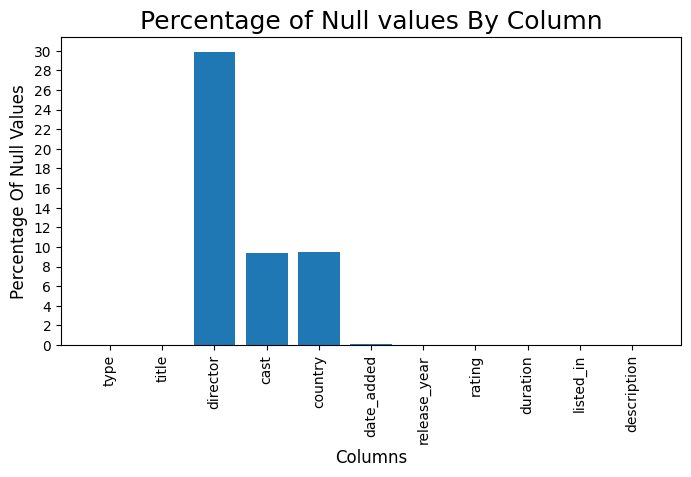

In [15]:
# Ploting the bar graph

plt.figure(figsize = (8,4))

plt.bar(b.index,b)
#b.plot(kind = 'bar')

plt.title("Percentage of Null values By Column", fontsize = 18)
plt.xlabel("Columns", fontsize = 12)
plt.ylabel("Percentage Of Null Values", fontsize = 12)

plt.xticks(rotation = 90)
plt.yticks(q)

plt.show()

* **Handling Missing Values**

In [16]:
# Now we handle the null values
a['rating'].fillna('TV-MA', inplace = True)
a['director'].fillna('Unknown', inplace = True)
a['cast'].fillna('Unknown', inplace = True)
a['country'].fillna(a['country'][0], inplace = True)
a.dropna(subset = ['date_added','duration'], inplace = True)

In [17]:
a.shape

(8794, 11)

In [18]:
#use of mode()
#a['country'][0] OR
a['country'].mode()[0]

'United States'

* **Check if there area any duplicates**

In [19]:
a.duplicated('title').sum()

0

* **Convert a date column into some other format**

In [20]:
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8794 non-null   object
 1   title         8794 non-null   object
 2   director      8794 non-null   object
 3   cast          8794 non-null   object
 4   country       8794 non-null   object
 5   date_added    8794 non-null   object
 6   release_year  8794 non-null   int64 
 7   rating        8794 non-null   object
 8   duration      8794 non-null   object
 9   listed_in     8794 non-null   object
 10  description   8794 non-null   object
dtypes: int64(1), object(10)
memory usage: 824.4+ KB


* **Convert a date column into some other format & Correcting the datatype of few columns of the dataset**

In [21]:
#working of lambda function
#A lambda function can take any number of arguments, but can only have one expression.
x = lambda a, b : a * b
print(x(5, 6))

30


In [22]:
a['date_added'] = a['date_added'].str.strip()

a['date_added'] = a['date_added'].astype('datetime64[ns]')

# a['date_added'] = pd.to_datetime(a['date_added'])  OR

#a['date_added'] = a['date_added'].apply(lambda x: datetime.strptime(str(x), '%B %d, %Y').strftime('%Y-%m-%d')) OR 

#if you use pd.notna(x)---- a['date_added'] = a['date_added'].apply(lambda x: datetime.strptime(str(x), '%B %d, %Y').strftime('%Y-%m-%d') if pd.notna(x) else x)
#but here pd.notna(x) is not necessary


a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8794 non-null   object        
 1   title         8794 non-null   object        
 2   director      8794 non-null   object        
 3   cast          8794 non-null   object        
 4   country       8794 non-null   object        
 5   date_added    8794 non-null   datetime64[ns]
 6   release_year  8794 non-null   int64         
 7   rating        8794 non-null   object        
 8   duration      8794 non-null   object        
 9   listed_in     8794 non-null   object        
 10  description   8794 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.4+ KB


NOTE:

Here lambda x is a function which will take input from a['date_added'] column as we have applied lambda funtion to the column using "apply" method

In Python, you can often replace a **"for loop"** with the **"apply"** method when you are working with data in a pandas DataFrame. The apply method allows you to apply a function to each element in a DataFrame or a specific column without the need for an explicit for loop. This can make your code more concise and efficient.

pd.notna(x) is a function provided by the pandas library (pd is commonly used as an alias for pandas) to check if a value x is not a missing or NaN (Not-a-Number) value
This allows you to apply the date conversion and formatting only to non-missing values in the 'date_added' column.

* **Add two new columns**

In [23]:
#We use the .dt accessor to extract the date component and the year component from the 'datetime_column' and assign them to the new columns.

a['date_month'] = a['date_added'].dt.month.astype(int)
a['date_year'] = a['date_added'].dt.year.astype(int)
#a.info()

In [24]:
a['month']=a['date_added'].dt.month.astype(object)
a['year']=a['date_added'].dt.year.astype(int)
a.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8794 entries, s1 to s8807
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8794 non-null   object        
 1   title         8794 non-null   object        
 2   director      8794 non-null   object        
 3   cast          8794 non-null   object        
 4   country       8794 non-null   object        
 5   date_added    8794 non-null   datetime64[ns]
 6   release_year  8794 non-null   int64         
 7   rating        8794 non-null   object        
 8   duration      8794 non-null   object        
 9   listed_in     8794 non-null   object        
 10  description   8794 non-null   object        
 11  date_month    8794 non-null   int64         
 12  date_year     8794 non-null   int64         
 13  month         8794 non-null   object        
 14  year          8794 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(10

**Here we can see there is no null value left in the dataset**

In [25]:
a

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_month,date_year,month,year
show_id,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,9,2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,9,2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,9,2021
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,9,2021
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019,11,2019
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019,7,2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019,11,2019


**As we can see 2 new columns are added**

* **Now lets rename a column name and make few changes in that column**

In [26]:
a.rename(columns={'listed_in':'Genre'},inplace=True)
a

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_month,date_year,month,year
show_id,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,9,2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021,9,2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021,9,2021
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,2021,9,2021
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,2021,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",11,2019,11,2019
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",7,2019,7,2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,11,2019,11,2019


In [27]:
#An example to understand split()
x= 'CultMovies,Dramas,Thrillers'
x.split(',')

['CultMovies', 'Dramas', 'Thrillers']

In [28]:
x.split(',')[0]

'CultMovies'

In [29]:
#now lets make changes in the Genre column
a['Genre'] = a['Genre'].apply(lambda x: x.split(',')[0])
a

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_month,date_year,month,year
show_id,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021,9,2021
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",9,2021,9,2021
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...,9,2021,9,2021
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,United States,2021-09-24,2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo...",9,2021,9,2021
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,9,2021,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,Cult Movies,"A political cartoonist, a crime reporter and a...",11,2019,11,2019
s8804,TV Show,Zombie Dumb,Unknown,Unknown,United States,2019-07-01,2018,TV-Y7,2 Seasons,Kids' TV,"While living alone in a spooky town, a young g...",7,2019,7,2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,Comedies,Looking to survive in a world taken over by zo...,11,2019,11,2019


# **Exploatry Data Analysis & visualization**

# 1. Which year has the maximum no of TV Show and Movies released 

In [30]:
a['type'].value_counts()

type
Movie      6128
TV Show    2666
Name: count, dtype: int64

In [31]:
a['release_year'].value_counts().head()

release_year
2018    1146
2017    1031
2019    1030
2020     953
2016     901
Name: count, dtype: int64

In [32]:
a.release_year.value_counts().index[0:5]

Index([2018, 2017, 2019, 2020, 2016], dtype='int64', name='release_year')

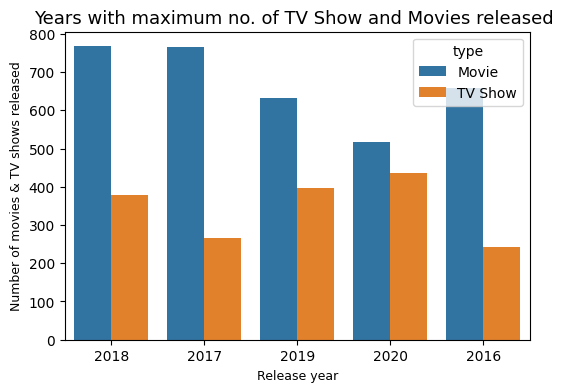

In [33]:
plt.figure(figsize=(6,4))

sns.countplot(x='release_year',order= a.release_year.value_counts().index[0:5], hue="type", data=a)

plt.title('Years with maximum no. of TV Show and Movies released ',fontsize=13)
plt.xlabel('Release year',fontsize=9)
plt.ylabel('Number of movies & TV shows released',fontsize=9)

plt.show()

**As per the graph we can say that in year 2018 most of the TV shows & movies were released**

* # Which year has the maximum no of TV Show released

In [34]:
tv= a[a['type']== 'TV Show']
Mov= a[a['type']== 'Movie']

In [35]:
tv['release_year'].value_counts().head()

release_year
2020    436
2019    397
2018    379
2021    315
2017    265
Name: count, dtype: int64

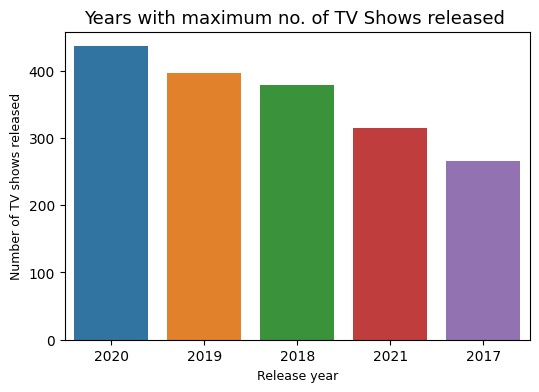

In [36]:
#using seaborn
plt.figure(figsize=(6,4))

sns.countplot(x='release_year',order= tv['release_year'].value_counts().head().index[0:5], data=tv)

plt.title('Years with maximum no. of TV Shows released ',fontsize=13)
plt.xlabel('Release year',fontsize=9)
plt.ylabel('Number of TV shows released',fontsize=9)

plt.show()

**As per the graph we can say that in year 2020 most of the TV shows were released**

* #  Which year has the maximum no of Movies released

In [37]:
Mov['release_year'].value_counts().head()

release_year
2018    767
2017    766
2016    658
2019    633
2020    517
Name: count, dtype: int64

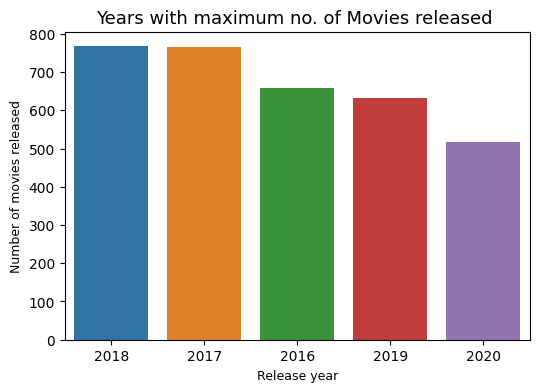

In [38]:
#using seaborn
plt.figure(figsize=(6,4))

sns.countplot(x='release_year',order= Mov['release_year'].value_counts().head().index[0:5], data=Mov)

plt.title('Years with maximum no. of Movies released ',fontsize=13)
plt.xlabel('Release year',fontsize=9)
plt.ylabel('Number of movies released',fontsize=9)

plt.show()

**As per the graph we can say that in year 2018 most of the movies were released**

# 2. Which country has produced more Movies and TV shows?

In [39]:
a.country.value_counts()

country
United States                             3639
India                                      972
United Kingdom                             418
Japan                                      244
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

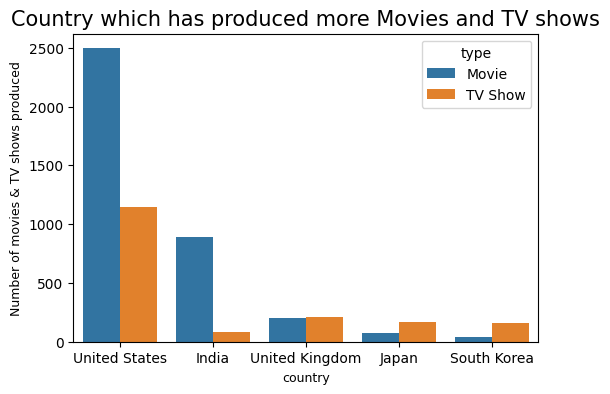

In [40]:
plt.figure(figsize=(6,4))


sns.countplot(x='country',order= a.country.value_counts().index[0:5], hue="type", data=a)

plt.title('Country which has produced more Movies and TV shows',fontsize=15)
plt.xlabel('country',fontsize=9)
plt.ylabel('Number of movies & TV shows produced',fontsize=9)

plt.show()


**As per the graph we can say that United States is the country which produce most of the movies and tv shows.**

* # Which country has produced more TV shows?

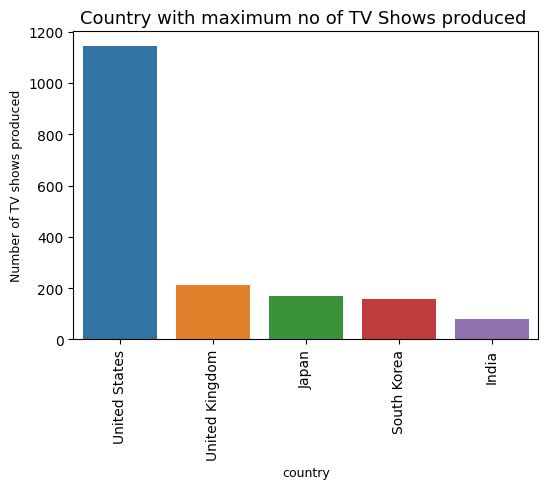

In [41]:
#using seaborn
plt.figure(figsize=(6,4))

sns.countplot(x='country',order= tv['country'].value_counts().head().index, data=tv)

plt.title('Country with maximum no of TV Shows produced ',fontsize=13)
plt.xlabel('country',fontsize=9)
plt.ylabel('Number of TV shows produced',fontsize=9)

plt.xticks(rotation=90)

plt.show()

**As per the graph we can say that United States is the country which produce most of the tv shows.**

* # Which country has produced more Movies?

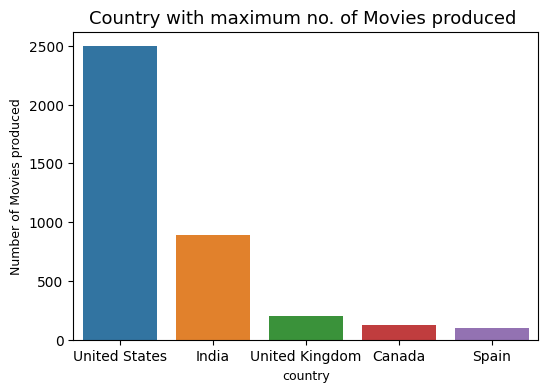

In [42]:
#using seaborn
plt.figure(figsize=(6,4))

sns.countplot(x='country',order= Mov['country'].value_counts().head().index, data=Mov)

plt.title('Country with maximum no. of Movies produced ',fontsize=13)
plt.xlabel('country',fontsize=9)
plt.ylabel('Number of Movies produced',fontsize=9)

plt.show()

**As per the graph we can say that United States is the country which produce most of the movies.**

# 3. Which rating has the highest no. of counts

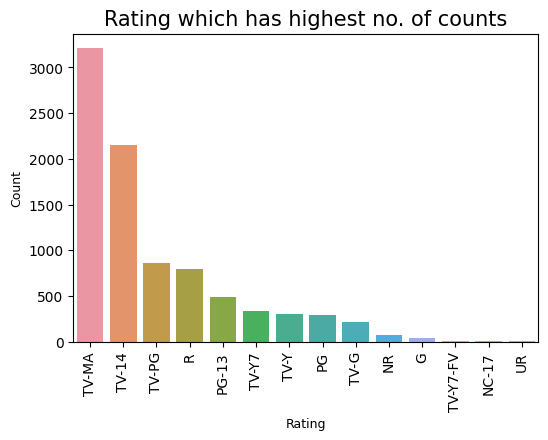

In [43]:
plt.figure(figsize=(6,4))

sns.countplot(x='rating',order= a.rating.value_counts().index, data=a)
sns.set(style="darkgrid")

plt.title('Rating which has highest no. of counts',fontsize=15)
plt.xlabel('Rating',fontsize=9)
plt.ylabel('Count',fontsize=9)

plt.xticks(rotation=90)

plt.show()

**As per the graph we can say that TV-MA has the most no. of rating counts**

# 4. Most popular genre according to the type

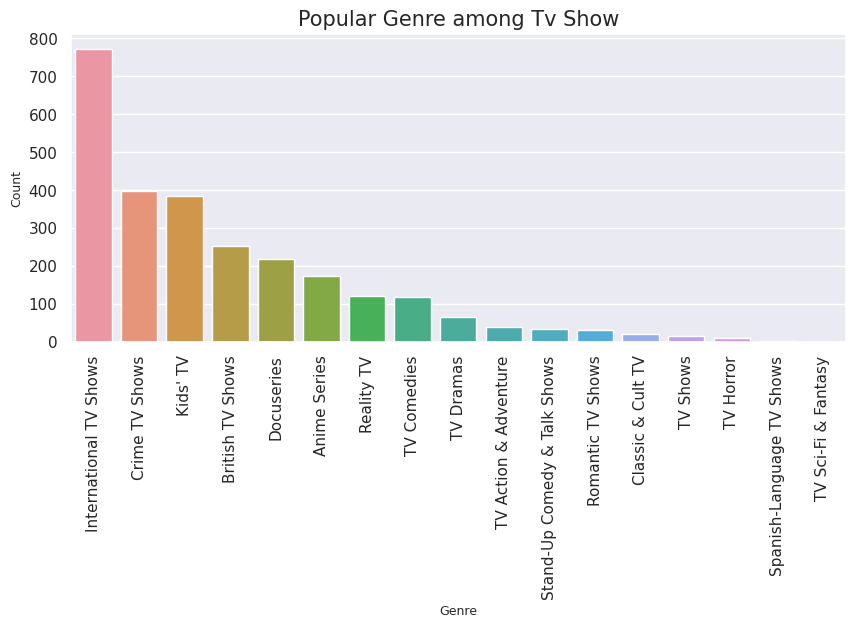

In [44]:
#Popular Genre among Tv Show
plt.figure(figsize=(10,4))

sns.countplot(x='Genre',order= tv.Genre.value_counts().index, data=a) #data can be either tv or a
sns.set(style="darkgrid")

plt.title('Popular Genre among Tv Show',fontsize=15)
plt.xlabel('Genre',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90)

plt.show()

**As per the graph we can say that International TV Shows are most popular genre in Tv shows**

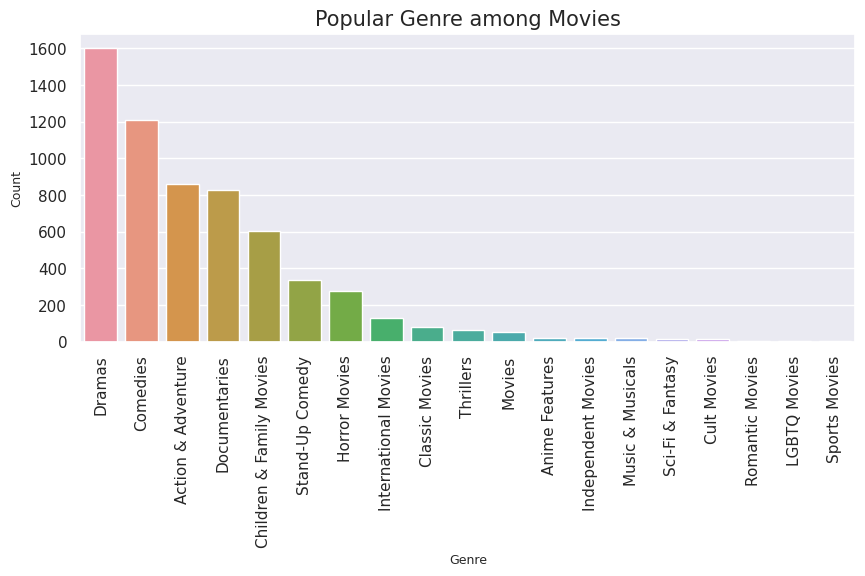

In [45]:
#Popular Genre among Movies
plt.figure(figsize=(10,4))

sns.countplot(x='Genre',order= Mov.Genre.value_counts().index, data=a) #data can be either tv or a
sns.set(style="darkgrid")

plt.title('Popular Genre among Movies',fontsize=15)
plt.xlabel('Genre',fontsize=9)
plt.ylabel('Count',fontsize=9)
plt.xticks(rotation=90)

plt.show()

**As per the graph we can say that Dramas are most popular genre in movies**

# 5. Which Genre has the highest no. of counts

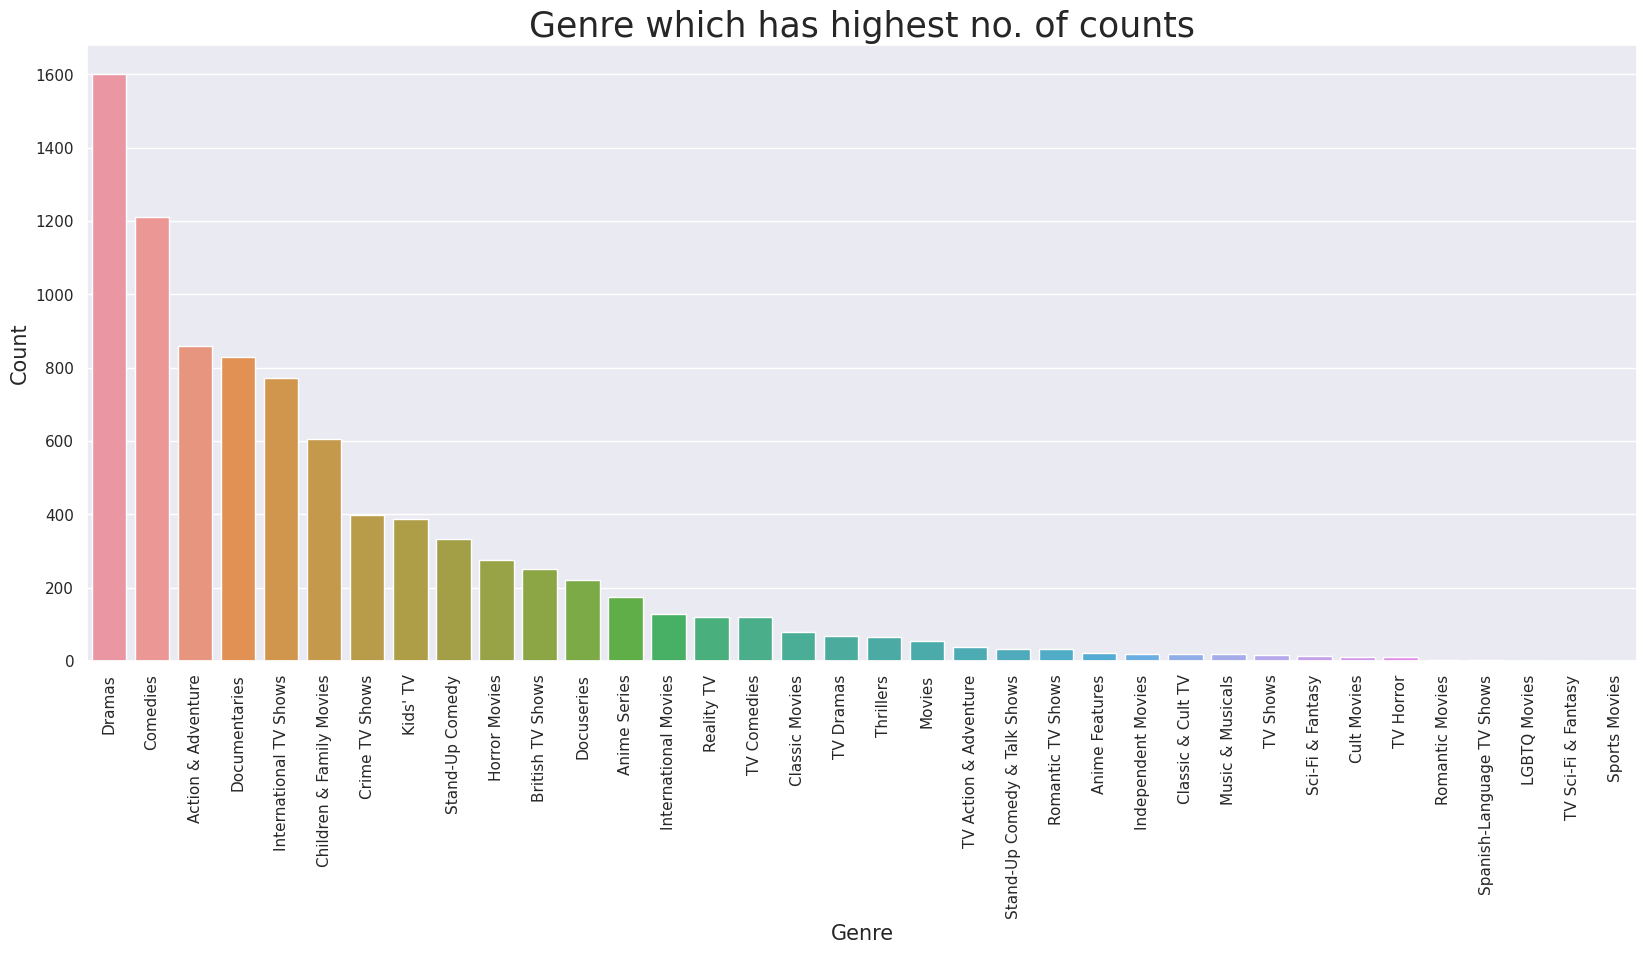

In [46]:
plt.figure(figsize=(20,8))

sns.countplot(x='Genre',order= a.Genre.value_counts().index, data=a)
sns.set(style="darkgrid")

plt.title('Genre which has highest no. of counts',fontsize=25)
plt.xlabel('Genre',fontsize=15)
plt.ylabel('Count',fontsize=15)

plt.xticks(rotation=90)

plt.show()

**As per the graph we can say that Dramas genre has the most no. of counts**

# 6. Movie with most watch time over the year

In [47]:
# Replace the "min" string in the "duration" column with an empty string
Mov['duration'] = Mov['duration'].str.replace(' min', '')

# Convert the "duration" column to numeric
#Mov['duration']=Mov['duration'].astype('int') OR
Mov['duration'] = pd.to_numeric(Mov['duration'], errors='coerce') 

Mov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6128 entries, s1 to s8807
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          6128 non-null   object        
 1   title         6128 non-null   object        
 2   director      6128 non-null   object        
 3   cast          6128 non-null   object        
 4   country       6128 non-null   object        
 5   date_added    6128 non-null   datetime64[ns]
 6   release_year  6128 non-null   int64         
 7   rating        6128 non-null   object        
 8   duration      6128 non-null   int64         
 9   Genre         6128 non-null   object        
 10  description   6128 non-null   object        
 11  date_month    6128 non-null   int64         
 12  date_year     6128 non-null   int64         
 13  month         6128 non-null   object        
 14  year          6128 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(9)

When you set errors='coerce', pandas will attempt to convert the data to the desired format (e.g., datetime), but if it encounters any errors during the conversion, it will replace those problematic values with a special marker called NaT (Not-a-Time) for datetime objects.

NaT is equivalent to NaN (Not-a-Number) for numeric data and is used to represent missing or undefined values in pandas datetime data types.

In [48]:
Mov

,type,title,director,cast,country,date_added,release_year,rating,duration,Genre,description,date_month,date_year,month,year
show_id,,,,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",9,2021,9,2021
s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,9,2021,9,2021
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125,Dramas,"On a photo shoot in Ghana, an American model s...",9,2021,9,2021
s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104,Comedies,A woman adjusting to life after a loss contend...,9,2021,9,2021
s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127,Dramas,After most of her family is murdered in a terr...,9,2021,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",2016-03-09,2015,TV-MA,96,Dramas,Recovering alcoholic Talal wakes up inside a s...,3,2016,3,2016
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,Cult Movies,"A political cartoonist, a crime reporter and a...",11,2019,11,2019
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,Comedies,Looking to survive in a world taken over by zo...,11,2019,11,2019


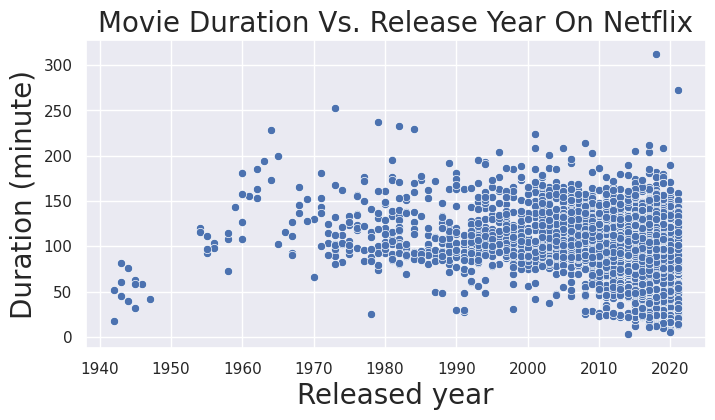

In [49]:
#Create a scatterplot using seaborn, we can also use Matplotlib/plotly.express

plt.figure(figsize = (8,4))

sns.scatterplot(x = "release_year", y = "duration",data=Mov)
plt.title("Movie Duration Vs. Release Year On Netflix", fontsize = 20)
plt.xlabel("Released year", fontsize = 20)
plt.ylabel("Duration (minute)", fontsize = 20)
plt.show()

# 7. Distribution of movie duration on Netflix

In [50]:
# Create a histogram of the "duration" column using plotly.express, we can also use Matplotlib/seaborn

fig = px.histogram(x='duration',data_frame=Mov,nbins=30,title='Distribution of Movie Durations on Netflix')

# Update the x-axis label
fig.update_xaxes(title_text='Duration (minutes)')

# Update the y-axis label
fig.update_yaxes(title_text='Count')

# Show the plot
fig.show()

# 8.Top 10 director with most content on netflix

In [51]:
 a.director.value_counts()

director
Unknown                           2624
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Marcus Raboy                        16
Suhas Kadav                         16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

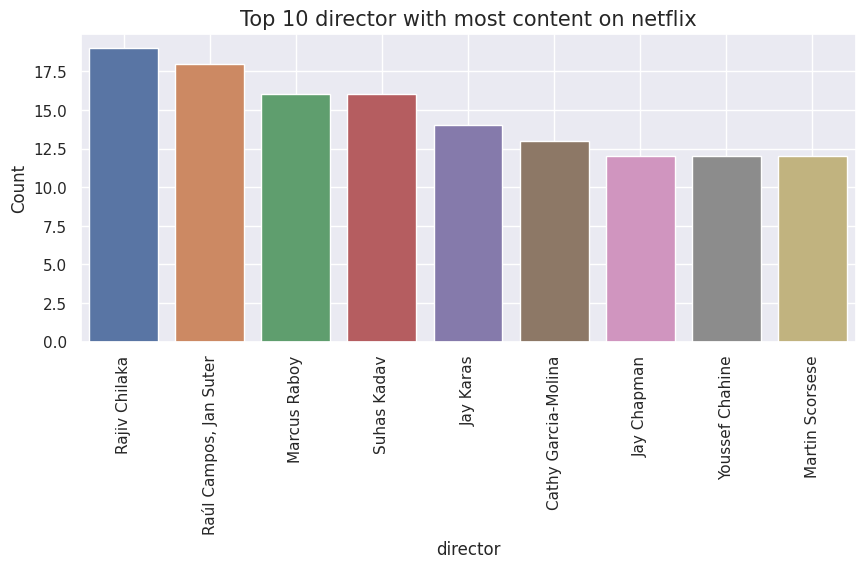

In [52]:
plt.figure(figsize=(10,4))

sns.countplot(x='director',order= a.director.value_counts().index[1:10], data=a)

plt.title('Top 10 director with most content on netflix',fontsize=15)
plt.xlabel('director',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.xticks(rotation=90)

plt.grid(axis='x')
plt.show()

**Rajiv Chilaka is the director with most content on netflix**

# 9. List of all director name using wordcloud

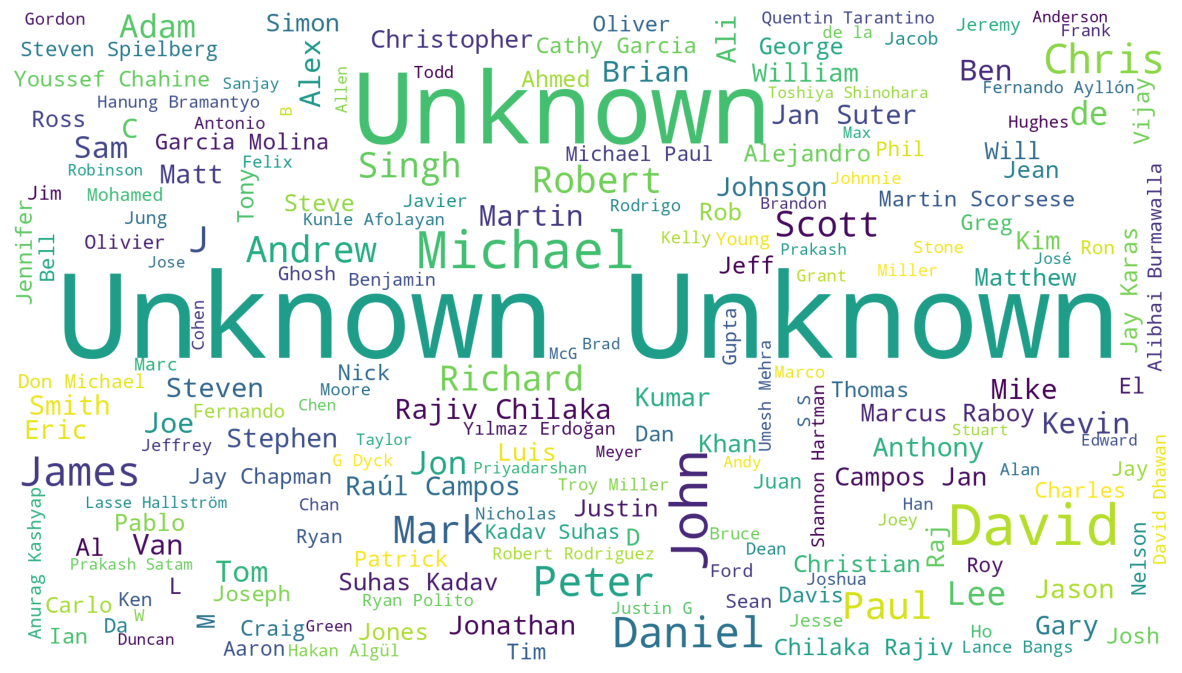

In [53]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(a.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director name.png')
plt.show()

# 10. List of all country name using wordcloud

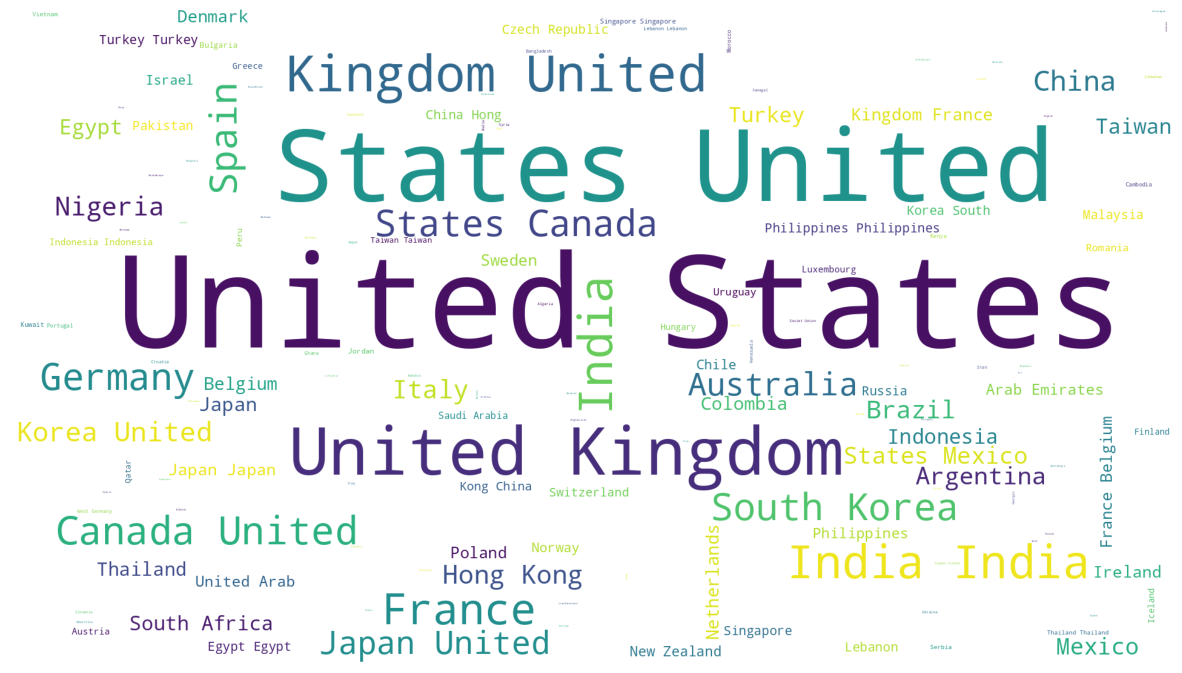

In [54]:
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(a.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()

# **Conclusion**

* **In this notebook, we have successfully performed Exploratory Data Analytics (EDA) using Netflix shows Dataset.**

* **Before performing the analysis, we ran some queries for data cleaning and manipulation.**

* **We have analyzed the data as well as do visualizations for the better and enhanced insights**

# Some interesting insights from the analysis:

* **In year 2018 most of the TV shows & movies were released**
    
    In year 2020 most of the **TV shows** were released
    
    In year 2018 most of the **movies** were released

* **United States is the country which produce most of the movies and tv shows.India comes after USA.**

    United States is the country which produce most of the **tv shows only**. United kingdom comes after USA.
    
    United States is the country which produce most of the **movies only**. India comes after USA.

* **TV-MA has the most no. of rating counts.**
* **International TV Shows are most popular genre in Tv shows.**
* **Dramas are most popular genre in movies.**
* **Dramas genre has the most no. of counts.**
* **Rajiv Chilaka is the director with most content on netflix**
